<a href="https://colab.research.google.com/github/palakr0110/Consumer_Complaint_Classification/blob/main/Consumer_complaint_classification%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we are provided with a complaint registered by a consumer. Our main aim is to predict for which product complaint has been registered. The classification task would help to quickly identify and provide customized solutions to each customer based on complaints received department wise

The data contains the following columns-
(1)Date received	
(2)Product	
(3)Sub-product
(4)Issue	
(5)Sub-issue	
(6)Consumer Complaint	
(6)Company Public Response	
(7)Company	
(8)State	
(9)ZIP code	
(10)Tags	
(11) Consumer consent provided	
(12)Submitted via	
(13)Date Sent to Company
(14)Company Response to Consumer
(15)Timely response
(16)Consumer disputed	
(17)Complaint ID
I have performed initial analysis using text data with plots of each department and performed various text pre-processing steps including Text Standardization,Utilized Machine learning and Deep Learning methods to classify text data into 11 categories.

In this project, the following steps have been followed:

-Importing data
- Data pre-processing
-Model Training
-Hyperparameter Tuning


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
from google.colab import files
files.upload

<function google.colab.files.upload>

In [ ]:
df = pd.read_csv('Consumer_Complaints.csv')


In [ ]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID
0,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/14,Closed with explanation,Yes,No,759217
1,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10-05-2016,Closed with explanation,Yes,No,2141773
2,10/17/16,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/16,Closed with explanation,Yes,No,2163100
3,06-08-2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06-10-2014,Closed with explanation,Yes,Yes,885638
4,9/13/14,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,9/13/14,Closed with explanation,Yes,Yes,1027760


In [ ]:
df.shape

(9999, 18)

In [ ]:
#We need only 2 columns to predict
col = ['Product','Consumer Complaint']
df = df[col]

In [ ]:
#Fill null values
df = df[pd.notnull(df['Consumer Complaint'])]

In [ ]:
df.columns = ['Product','Consumer_complaint']

In [ ]:
#Creating a new column category_id from product column to ensure uniqueness
df['category_id'] = df['Product'].factorize()[0] 

In [ ]:
cat_id_df = df[['Product','category_id']].drop_duplicates().sort_values('category_id')

In [ ]:
id_to_cat = dict(cat_id_df.values)

In [ ]:
id_to_cat = dict(cat_id_df[['category_id','Product']].values)

In [ ]:
df.head()

,Product,Consumer_complaint,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2


In [ ]:
fig = plt.figure(figsize = (8,6))

<Figure size 576x432 with 0 Axes>

We’ll check the disribution of complaints by product category to understand which product received maximum complaints and other products which  receive less complaints.

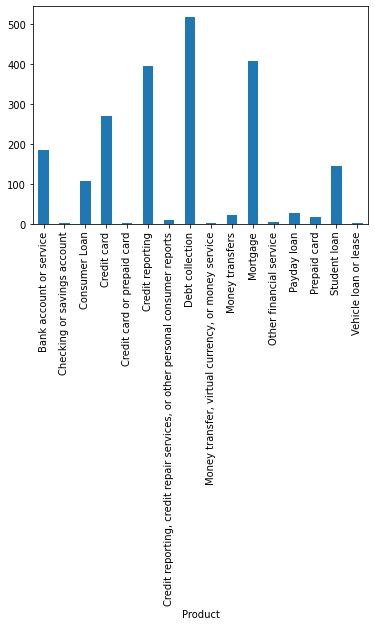

In [ ]:
df.groupby('Product').Consumer_complaint.count().plot.bar(ylim=0)

Dataset is more biased towards Debt collection,Mortage and Credit Reporting

We need to provide different numerical features vectors to different text documents. Our classifier cannot directly use this text document, We need to convert our dataset into fixed numerical feature document. So we will use TfidVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf = True,#use logarithimic form of frequency,
                        min_df = 5,
                        norm = 'l2',# All feature vector have norm of 1,
                        ngram_range = (1,2), # We want to consider both unigram and bigram,
                        stop_words ='english') # Remove common pronouns to reduce number of noisy features

In [ ]:
features = tfidf.fit_transform(df.Consumer_complaint).toarray()

In [ ]:
labels = df.category_id
features.shape

(2114, 6081)

Model Building

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(df['Consumer_complaint'], df['Product'], random_state = 0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vect = CountVectorizer()

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

After conversion from text to numerical vectors we can fit different classifiers and determine their accuracy

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_tfidf,y_train)

In [ ]:
print(clf.predict(count_vect.transform(['I have outdated information on my credit repor'])))

['Credit reporting']


In [ ]:
y_pred = clf.predict(count_vect.transform(X_test))

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.60      0.80      0.69        44
                                                               Consumer Loan       0.36      0.43      0.39        21
                                                                 Credit card       0.69      0.78      0.73        72
                                                            Credit reporting       0.70      0.87      0.77        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.86      0.69      0.76       124
                                                             Money transfers       0.20      0.09      0.13        11
                                                       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Our model is giving accuracy of 75%.

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
text_clf = Pipeline([('tf',TfidfVectorizer(sublinear_tf = True,
                                            min_df = 5,
                                            norm= 'l2' ,
                                            ngram_range = (1,2),
                                            stop_words = 'english')),
                                           ('clf',LinearSVC())])

In [ ]:
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', LinearSVC())])

In [ ]:
text_clf.predict(['I have outdated information on my credit repor'])[0]

'Credit reporting'

In [ ]:
cv_results = cross_val_score(text_clf,X_train, y_train,cv = 5, scoring = 'accuracy', n_jobs = -1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


In [ ]:
print(np.mean(cv_results))

0.7936908517350157


Accuracy of this model is 79%

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
mb = BernoulliNB()

In [ ]:
text_clf = Pipeline([('tf',TfidfVectorizer(sublinear_tf = True,
                                            min_df = 5,
                                            norm= 'l2' ,
                                            ngram_range = (1,2),
                                            stop_words = 'english')),
                                           ('clf',BernoulliNB())])

In [ ]:
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', BernoulliNB())])

In [ ]:
text_clf.predict(['I have outdated information on my credit repor'])[0]

'Credit reporting'

In [ ]:
y_pred = text_clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.71      0.55      0.62        44
                                                               Consumer Loan       0.50      0.14      0.22        21
                                                                 Credit card       0.69      0.60      0.64        72
                                                            Credit reporting       0.60      0.92      0.73        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.63      0.84      0.72       124
                                                             Money transfers       0.00      0.00      0.00        11
                                                       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Our model is giving 69% Accuracy

In [ ]:
cv_results = cross_val_score(text_clf,X_train,y_train,cv = 5, scoring ='accuracy',n_jobs = -1)
print(np.mean(cv_results))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


0.6580441640378549


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
text_clf = Pipeline([('tf',TfidfVectorizer(sublinear_tf = True,
                                            min_df = 5,
                                            norm= 'l2' ,
                                            ngram_range = (1,2),
                                            stop_words = 'english')),
                                           ('clf',DecisionTreeClassifier())])

In [ ]:
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', DecisionTreeClassifier())])

In [ ]:
text_clf.predict(['I have outdated information on my credit repor'])[0]

'Debt collection'

In [ ]:
y_pred = text_clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.37      0.57      0.45        44
                                                               Consumer Loan       0.26      0.29      0.27        21
                                                                 Credit card       0.69      0.69      0.69        72
                                                            Credit reporting       0.62      0.74      0.67        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.71      0.67      0.69       124
                                                             Money transfers       0.00      0.00      0.00        11
                                                       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Our model is giving us 63% Accuracy

In [ ]:
cv_results = cross_val_score(text_clf,X_train,y_train,cv = 5, scoring ='accuracy',n_jobs = -1)
print(np.mean(cv_results))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


0.6182965299684542


In [ ]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
text_clf = Pipeline([('tf',TfidfVectorizer(sublinear_tf = True,
                                            min_df = 5,
                                            norm= 'l2' ,
                                            ngram_range = (1,2),
                                            stop_words = 'english')),
                                           ('clf',CatBoostClassifier())])

In [ ]:
text_clf.fit(X_train,y_train)

Learning rate set to 0.081007
0:	learn: 2.4854640	total: 1.12s	remaining: 18m 35s
1:	learn: 2.2831591	total: 2.22s	remaining: 18m 28s
2:	learn: 2.1564614	total: 3.33s	remaining: 18m 28s
3:	learn: 2.0605129	total: 4.46s	remaining: 18m 31s
4:	learn: 1.9462300	total: 5.59s	remaining: 18m 31s
5:	learn: 1.8610484	total: 6.73s	remaining: 18m 35s
6:	learn: 1.7890315	total: 7.84s	remaining: 18m 32s
7:	learn: 1.7248507	total: 8.96s	remaining: 18m 30s
8:	learn: 1.6704831	total: 10.1s	remaining: 18m 30s
9:	learn: 1.6290230	total: 11.2s	remaining: 18m 28s
10:	learn: 1.5851092	total: 12.3s	remaining: 18m 27s
11:	learn: 1.5387648	total: 13.5s	remaining: 18m 27s
12:	learn: 1.5082813	total: 14.6s	remaining: 18m 28s
13:	learn: 1.4703662	total: 15.7s	remaining: 18m 25s
14:	learn: 1.4445402	total: 16.8s	remaining: 18m 23s
15:	learn: 1.4213383	total: 17.9s	remaining: 18m 22s
16:	learn: 1.3953513	total: 19.1s	remaining: 18m 22s
17:	learn: 1.3735164	total: 20.2s	remaining: 18m 20s
18:	learn: 1.3509443	total

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf',
                 <catboost.core.CatBoostClassifier object at 0x7f36e55ed1d0>)])

In [ ]:
text_clf.predict(['I have outdated information on my credit repor'])[0]

array(['Credit reporting'], dtype=object)

In [ ]:
y_pred = text_clf.predict(X_test)

In [ ]:
y_pred

array([['Credit card'],
       ['Credit card'],
       ['Debt collection'],
       ['Debt collection'],
       ['Mortgage'],
       ['Credit reporting'],
       ['Student loan'],
       ['Credit card'],
       ['Debt collection'],
       ['Bank account or service'],
       ['Mortgage'],
       ['Bank account or service'],
       ['Mortgage'],
       ['Debt collection'],
       ['Debt collection'],
       ['Mortgage'],
       ['Mortgage'],
       ['Mortgage'],
       ['Mortgage'],
       ['Mortgage'],
       ['Debt collection'],
       ['Mortgage'],
       ['Credit reporting'],
       ['Debt collection'],
       ['Credit reporting'],
       ['Credit reporting'],
       ['Debt collection'],
       ['Credit reporting'],
       ['Bank account or service'],
       ['Credit card'],
       ['Credit reporting'],
       ['Credit reporting'],
       ['Bank account or service'],
       ['Bank account or service'],
       ['Credit card'],
       ['Bank account or service'],
       ['Credit card'],

In [ ]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.65      0.75      0.69        44
                                                               Consumer Loan       0.79      0.52      0.63        21
                                                                 Credit card       0.75      0.78      0.76        72
                                                            Credit reporting       0.79      0.85      0.81        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.72      0.82      0.77       124
                                                             Money transfers       0.00      0.00      0.00        11
                                                       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cv_results = cross_val_score(text_clf,X_train,y_train,cv = 5, scoring ='accuracy',n_jobs = -1)



In [ ]:

print(np.mean(cv_results))


0.6182965299684542


In [ ]:
from xgboost import XGBClassifier

In [ ]:
text_clf = Pipeline([('tf',TfidfVectorizer(sublinear_tf = True,
                                            min_df = 5,
                                            norm= 'l2' ,
                                            ngram_range = (1,2),
                                            stop_words = 'english')),
                                           ('clf',XGBClassifier())])

In [ ]:
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', XGBClassifier(objective='multi:softprob'))])

In [ ]:
y_pred = text_clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.63      0.75      0.69        44
                                                               Consumer Loan       0.60      0.43      0.50        21
                                                                 Credit card       0.78      0.85      0.81        72
                                                            Credit reporting       0.80      0.86      0.83        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.74      0.85      0.79       124
                                                             Money transfers       0.00      0.00      0.00        11
                                                       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cv_results = cross_val_score(text_clf,X_train,y_train,cv = 5, scoring ='accuracy',n_jobs = -1)



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


In [ ]:
print(np.mean(cv_results))

0.7690851735015772


In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
text_clf = Pipeline([('tf',TfidfVectorizer(sublinear_tf = True,
                                            min_df = 5,
                                            norm= 'l2' ,
                                            ngram_range = (1,2),
                                            stop_words = 'english')),
                                           ('clf',LGBMClassifier())])

In [ ]:
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(min_df=5, ngram_range=(1, 2),
                                 stop_words='english', sublinear_tf=True)),
                ('clf', XGBClassifier(objective='multi:softprob'))])

In [ ]:
y_pred = text_clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.63      0.75      0.69        44
                                                               Consumer Loan       0.60      0.43      0.50        21
                                                                 Credit card       0.78      0.85      0.81        72
                                                            Credit reporting       0.80      0.86      0.83        91
Credit reporting, credit repair services, or other personal consumer reports       0.00      0.00      0.00         2
                                                             Debt collection       0.74      0.85      0.79       124
                                                             Money transfers       0.00      0.00      0.00        11
                                                       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cv_results = cross_val_score(text_clf,X_train,y_train,cv = 5, scoring ='accuracy',n_jobs = -1)



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


In [ ]:
print(np.mean(cv_results))

0.76403785488959


On assessing the accuracy level of various model XGB and LGBM give highest accuracy level followed by Cat Boost,Linear,Bernoulli and Decision Tree

Hyper-parameter tuning

Hyperparameter tuning is the process of determining the right combination of hyperparameters that maximizes the model performance. It works by running multiple trials in a single training process. Each trial is a complete execution of your training application with values for your chosen hyperparameters, set within the limits you specify. This process once finished will give the set of hyperparameter values that are best suited for the model to give optimal results. 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]


In [ ]:
random_grid = {'n_estimators':n_estimators, #Number of tress in Random forest
               'max_features':max_features, #Number of features considered at every split
               'max_depth':max_depth,       #max number of level in tree
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf} #min number of sample at each node

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf = RandomizedSearchCV(estimator = rf,param_distributions=random_grid,scoring = 'accuracy',n_iter = 10, cv = 5,n_jobs = -1)

In [ ]:
rf.fit(X_train_tfidf,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='accuracy')

In [ ]:
rf.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

In [ ]:
rf.best_score_

0.7205047318611987

In [ ]:
from scipy.stats import uniform,randint

In [ ]:
xgb = XGBClassifier()

In [ ]:
params = {
  'gamma':uniform(0,0.5),
  'learning rate':uniform(0.03,0.3),
  'n_estimators':randint(2,6),
  'max_depth':randint(100,150),
  'subsample':uniform(0.6,0.4)
}

In [ ]:
xgb = RandomizedSearchCV(estimator = xgb,param_distributions=params,scoring = 'accuracy',n_iter = 10,cv =5,n_jobs = -1)

In [ ]:
xgb.fit(X_train_tfidf,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f36cea47c10>,
                                        'learning rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f36cead1510>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f36cea47510>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f36cec16e50>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f36cead3bd0>},
                   scoring='accuracy')

In [ ]:
xgb.best_params_

{'gamma': 0.28227772403078777,
 'learning rate': 0.1298660492077458,
 'max_depth': 108,
 'n_estimators': 5,
 'subsample': 0.7280714931395069}

In [ ]:
xgb.best_score_

0.689589905362776

In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [('rf',rf),('mb',mb),('ab',XGBClassifier())]
clf = StackingClassifier(estimators=estimators)

In [ ]:
clf.fit(X_train_tfidf,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1097: RuntimeWarning: Number of classes in training fold (15) does not match total number of classes (16). Results may not be appropriate for your use case. To fix this, 

StackingClassifier(estimators=[('rf',
                                RandomizedSearchCV(cv=5,
                                                   estimator=RandomForestClassifier(),
                                                   n_jobs=-1,
                                                   param_distributions={'max_depth': [5,
                                                                                      10,
                                                                                      15,
                                                                                      20,
                                                                                      25,
                                                                                      30],
                                                                        'max_features': ['auto',
                                                                                         'sqrt'],
                     

In [ ]:
cv_results = cross_val_score(clf, X_train_tfidf,y_train,
                             cv=5,
                             scoring='accuracy',
                             n_jobs = -1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
print(np.mean(cv_results))

0.7697160883280756
